<a href="https://colab.research.google.com/github/bradykuo/WineQuality-Dataset-Analysis/blob/main/winequality_clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Setting up the Environment and Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data from Github

In [3]:
# Load the wine dataset
url = "https://raw.githubusercontent.com/bradykuo/WineQuality-Dataset-Analysis/main/winequality.csv"
df = pd.read_csv(url)

df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Create Box Plot for Each Feature

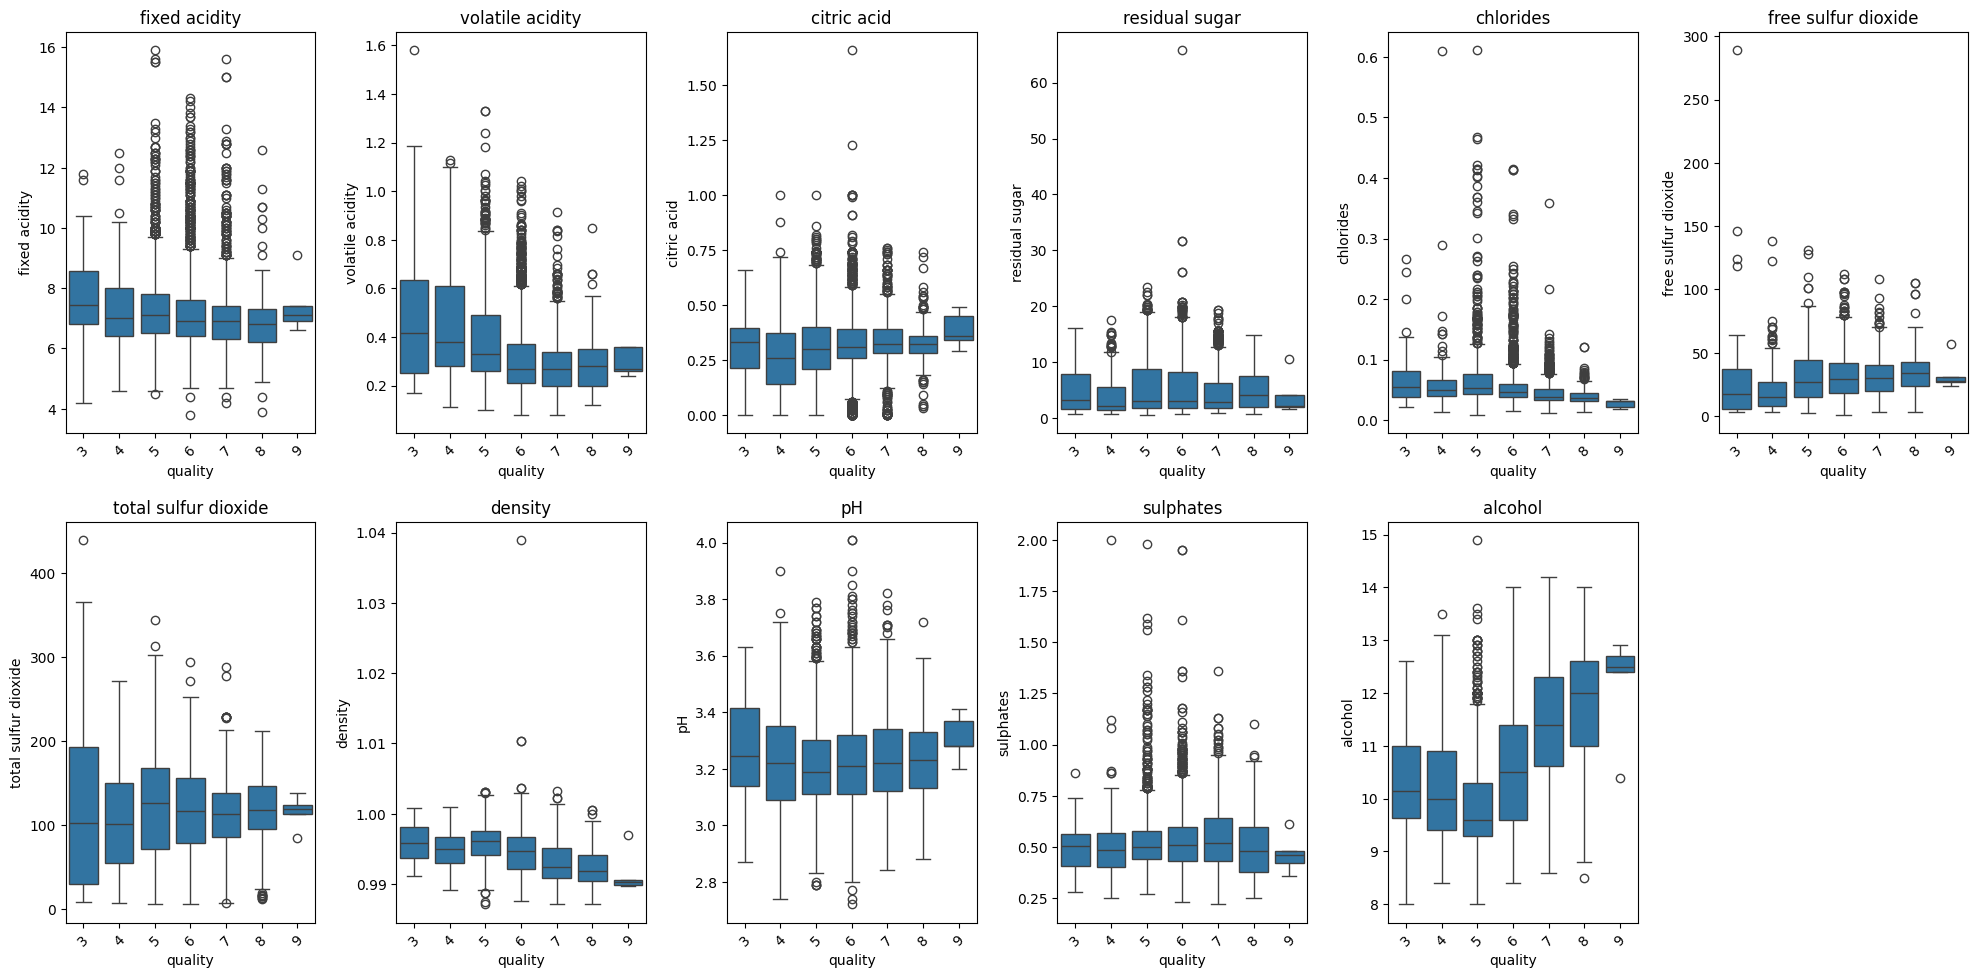

In [4]:
# List of features to plot
lst = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Create subplots
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
ax = ax.flatten()

# Create boxplots
for index, val in enumerate(lst):
    sns.boxplot(data=df, x='quality', y=val, ax=ax[index])
    ax[index].set_title(val)
    ax[index].tick_params(axis='x', rotation=45)

# Remove the empty subplot
fig.delaxes(ax[11])

# Adjust layout
plt.tight_layout(pad=1.5)
plt.show()

### Create a correlation coefficient matrix

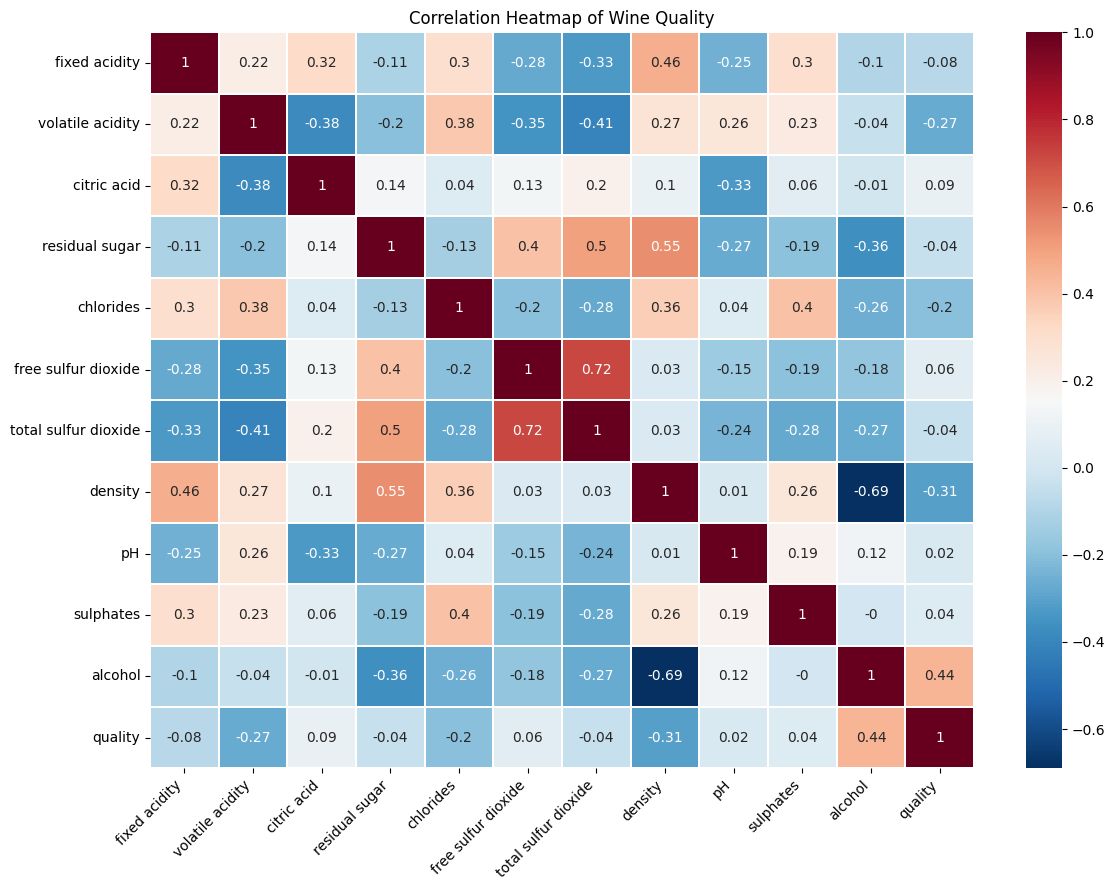


Correlations with wine quality (sorted):
quality                 1.00
alcohol                 0.44
citric acid             0.09
free sulfur dioxide     0.06
sulphates               0.04
pH                      0.02
residual sugar         -0.04
total sulfur dioxide   -0.04
fixed acidity          -0.08
chlorides              -0.20
volatile acidity       -0.27
density                -0.31
Name: quality, dtype: float64


In [5]:
# Select numerical columns
df_encoded_standard = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix_standard = df_encoded_standard.corr().round(2)

# Create heatmap
plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix_standard, annot=True, cmap='RdBu_r', linewidths=0.2)
plt.title("Correlation Heatmap of Wine Quality")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print correlations with quality, sorted
print("\nCorrelations with wine quality (sorted):")
print(correlation_matrix_standard['quality'].sort_values(ascending=False))

### Data Distribution of Wine Features

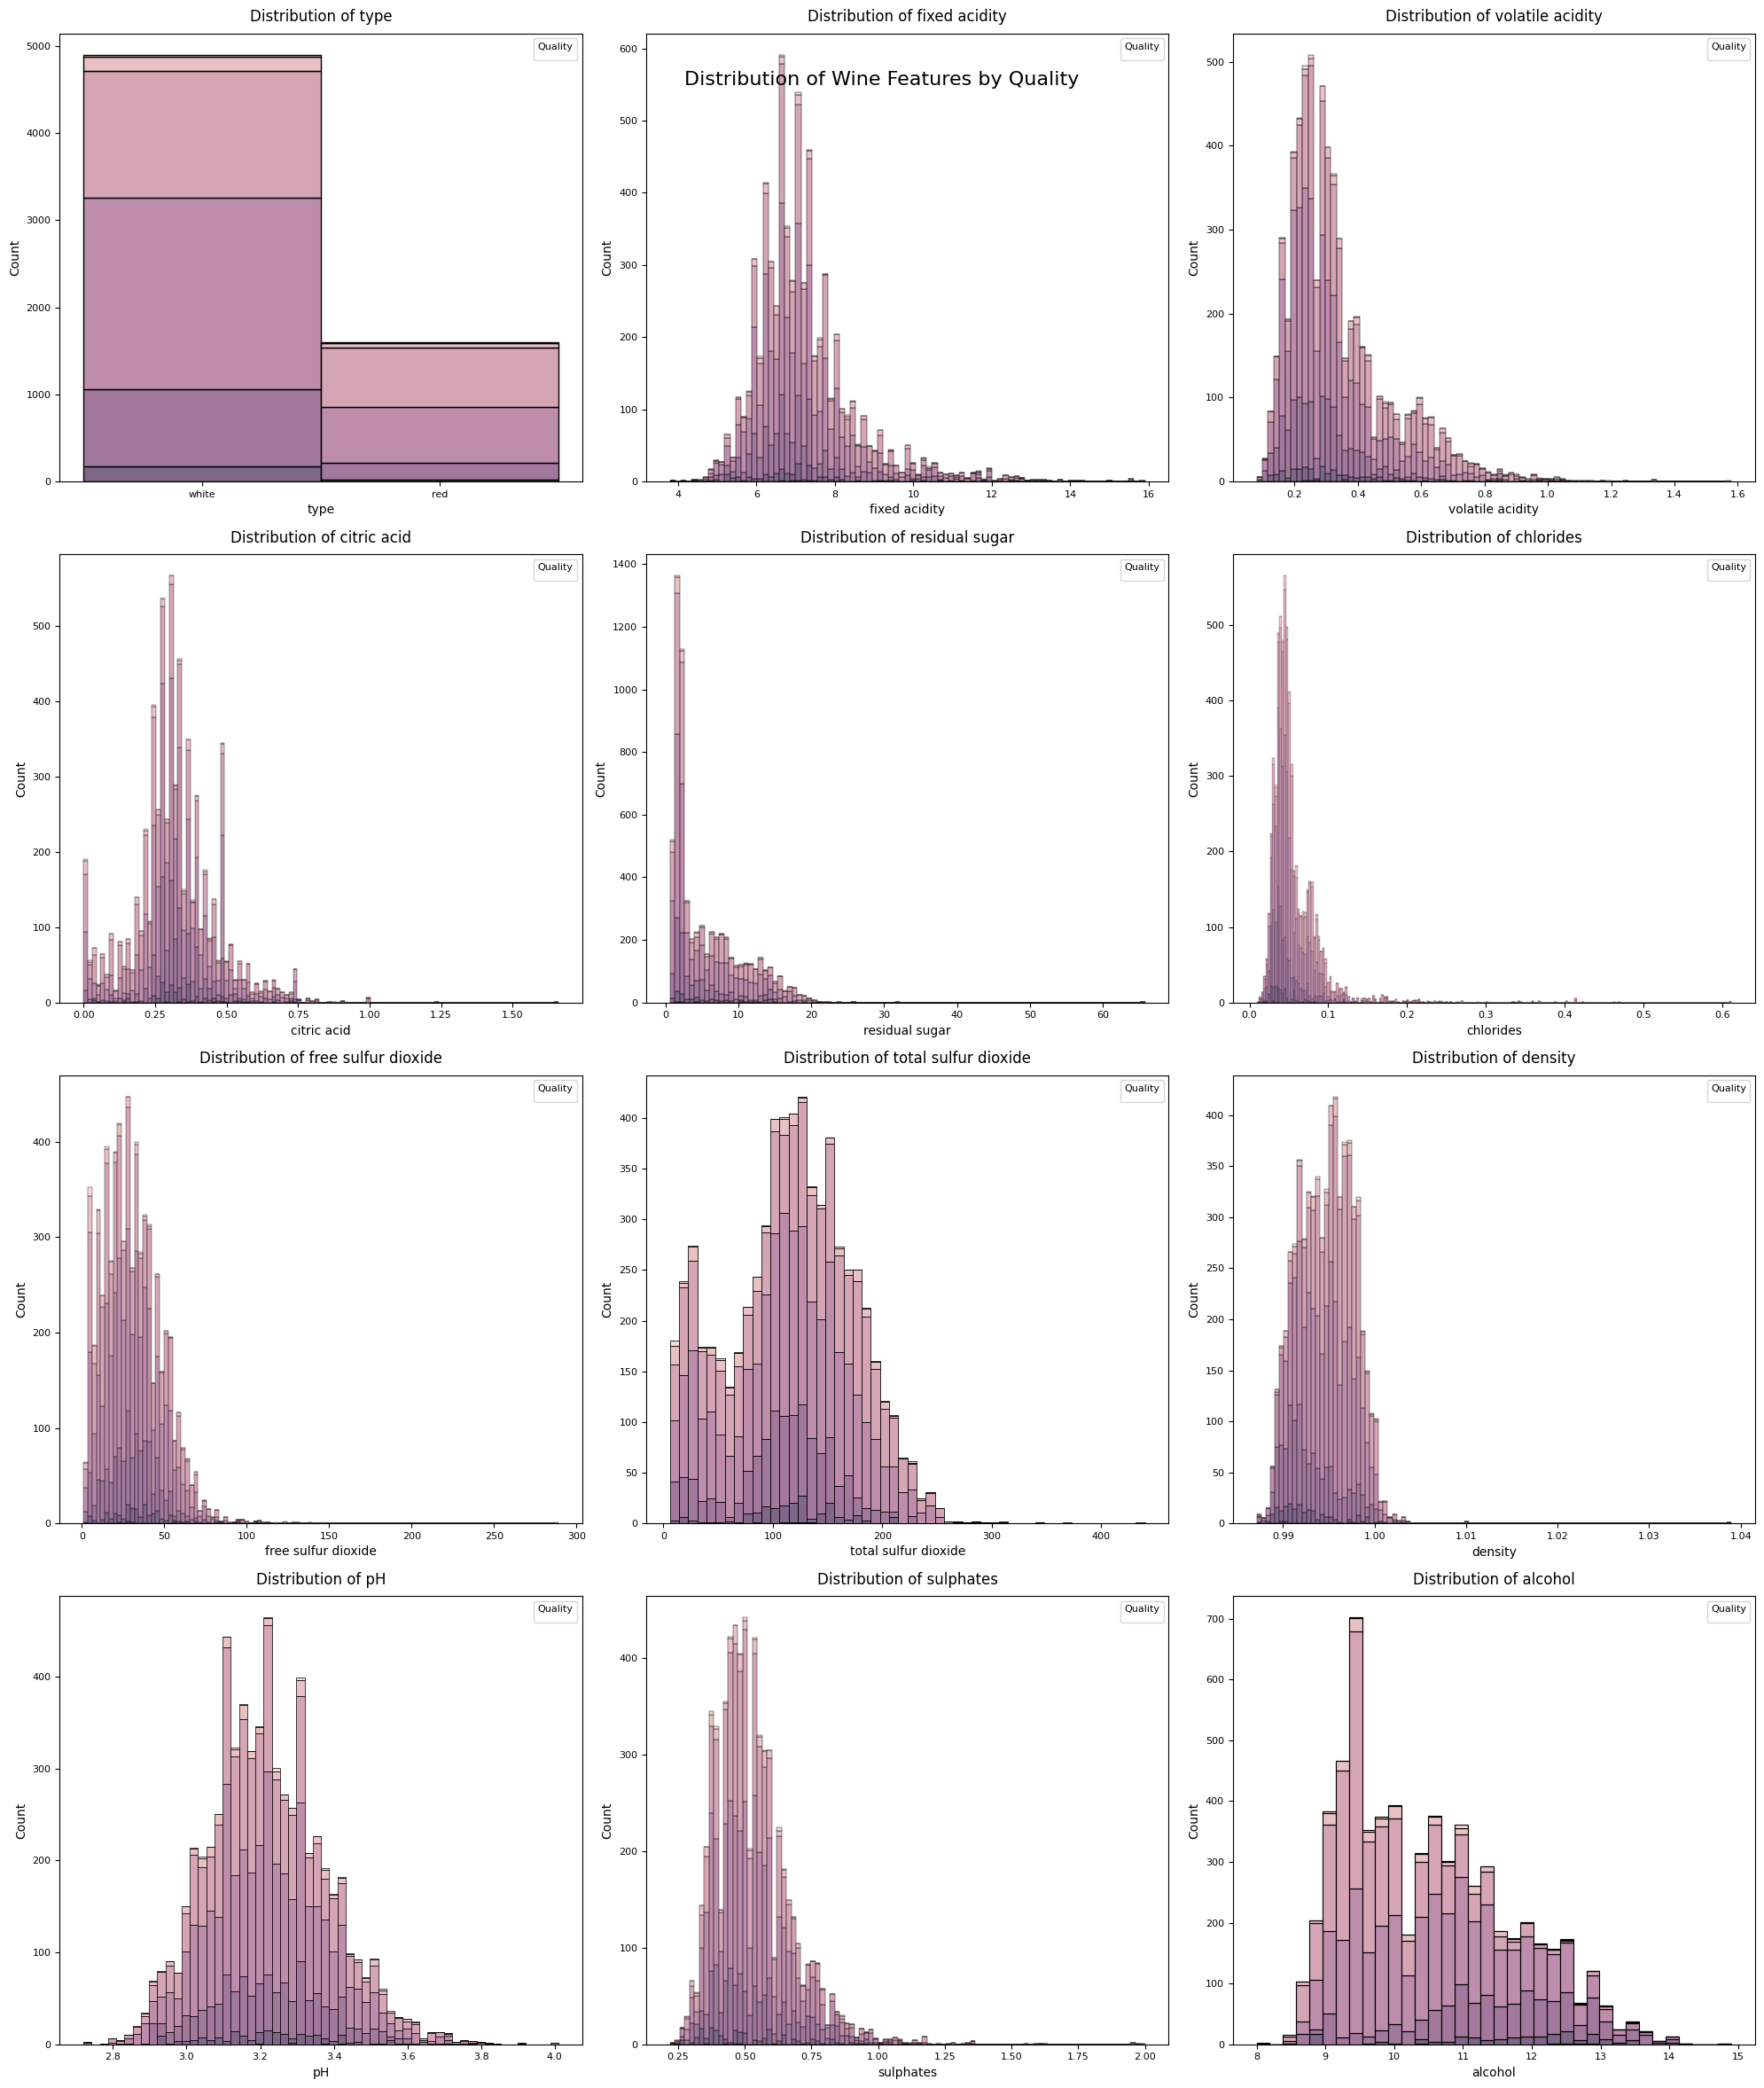


Summary Statistics for each Feature:

type:
        count unique    top  freq
quality                          
3          30      2  white    20
4         216      2  white   163
5        2138      2  white  1457
6        2836      2  white  2198
7        1079      2  white   880
8         193      2  white   175
9           5      1  white     5

fixed acidity:
          count   mean    std  min  25%   50%    75%   max
quality                                                   
3          30.0  7.853  1.748  4.2  6.8  7.45  8.575  11.8
4         216.0  7.289  1.265  4.6  6.4  7.00  8.000  12.5
5        2138.0  7.327  1.260  4.5  6.5  7.10  7.800  15.9
6        2836.0  7.177  1.291  3.8  6.4  6.90  7.600  14.3
7        1079.0  7.129  1.372  4.2  6.3  6.90  7.400  15.6
8         193.0  6.835  1.147  3.9  6.2  6.80  7.300  12.6
9           5.0  7.420  0.983  6.6  6.9  7.10  7.400   9.1

volatile acidity:
          count   mean    std   min    25%    50%    75%    max
quality            

In [6]:
# Get list of features (excluding quality)
features = df.columns.drop('quality').tolist()

# Create subplots for each feature
fig, axes = plt.subplots(4, 3, figsize=(20, 24))
axes = axes.ravel()

# Plot histograms for each feature
for idx, feature in enumerate(features):
    # Create histogram with kernel density estimate
    sns.histplot(data=df, x=feature, hue='quality', multiple="stack", ax=axes[idx])

    # Customize the plot
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, pad=10)
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(labelsize=8)

    # Add legend with smaller size
    axes[idx].legend(title='Quality', title_fontsize=8, fontsize=8)

# Remove the last empty subplot if exists
if len(features) < len(axes):
    fig.delaxes(axes[-1])

# Add a main title
fig.suptitle('Distribution of Wine Features by Quality', fontsize=16, y=0.95)

# Adjust layout
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for each Feature:")
for feature in features:
    print(f"\n{feature}:")
    print(df.groupby('quality')[feature].describe().round(3))

### Comparison of Machine Learning Classification Models

In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the wine dataset
url = "https://raw.githubusercontent.com/bradykuo/WineQuality-Dataset-Analysis/main/winequality.csv"
df = pd.read_csv(url)

###  Binary Classification Model to Classify Wines


Numerical Results:
----------------------------------------
Logistic Regression:
Mean Accuracy: 0.7427
Std Deviation: 0.0088

Decision Tree:
Mean Accuracy: 0.7410
Std Deviation: 0.0135

Random Forest:
Mean Accuracy: 0.8339
Std Deviation: 0.0111

SVM:
Mean Accuracy: 0.7728
Std Deviation: 0.0160



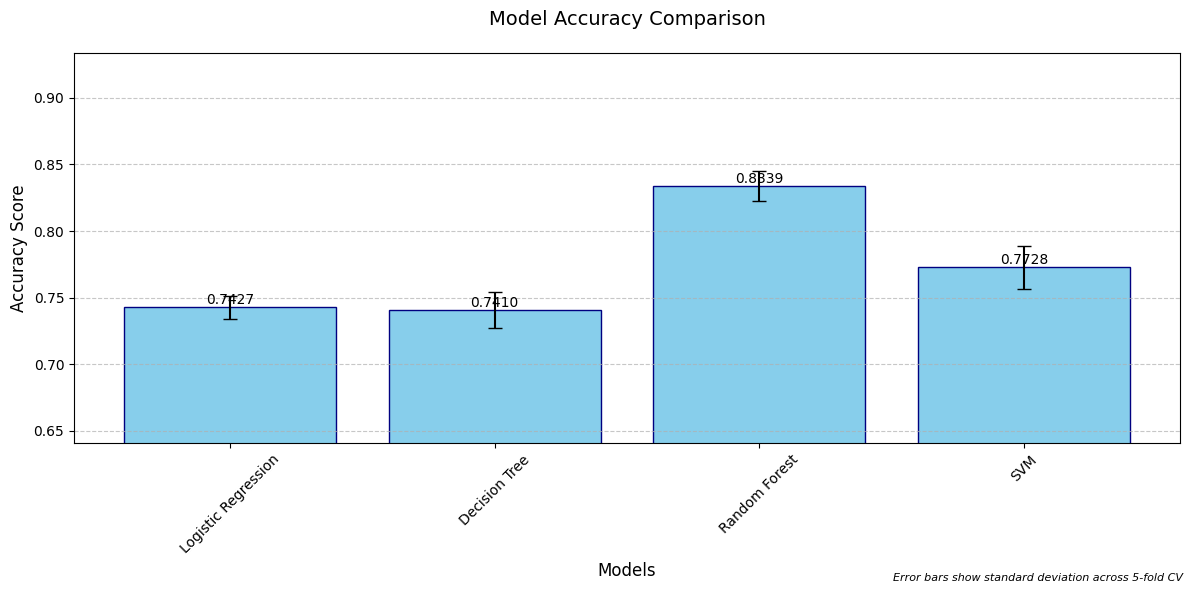

In [8]:
# Handle categorical 'type' column
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Create binary classification
df['quality_binary'] = (df['quality'] >= 6).astype(int)

# Prepare features and target
X = df.drop(['type', 'quality', 'quality_binary'], axis=1)
X['type'] = df['type_encoded']
y = df['quality_binary']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, kernel='rbf')
}

# Perform cross-validation and store results
cv_results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    cv_results[name] = scores

# Create DataFrame for visualization
results_df = pd.DataFrame(cv_results)
results_mean = results_df.mean()
results_std = results_df.std()

# Create figure and axis
plt.figure(figsize=(12, 6))

# Create bar plot
bars = plt.bar(range(len(models)), results_mean, yerr=results_std,
               capsize=5, color='skyblue', edgecolor='navy')

# Customize the plot
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xticks(range(len(models)), list(models.keys()), rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Set y-axis limits to better show differences
plt.ylim(min(results_mean) - 0.1, max(results_mean) + 0.1)

# Add error ranges in legend
plt.figtext(0.99, 0.02, 'Error bars show standard deviation across 5-fold CV',
            ha='right', va='bottom', fontsize=8, style='italic')

# Adjust layout
plt.tight_layout()

# Print numerical results
print("\nNumerical Results:")
print("-" * 40)
for model_name in models.keys():
    print(f"{model_name}:")
    print(f"Mean Accuracy: {results_mean[model_name]:.4f}")
    print(f"Std Deviation: {results_std[model_name]:.4f}")
    print()

plt.show()

### Divide the winequality dataset into three groups

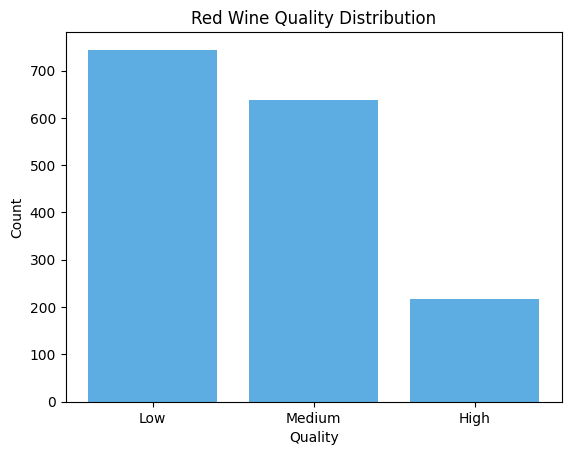

In [9]:
# Load the white winequality dataset
url = "https://raw.githubusercontent.com/bradykuo/WineQuality-Dataset-Analysis/main/winequality-red.csv"
df = pd.read_csv(url)

# Split the data into features (X) and target variable (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
quality_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "Medium",7: "High",8 : "High",9 : "High"}
y =  df['quality'].map(quality_mapping)

# Define the counts for each quality level
quality_counts = y.value_counts()

# Create a bar plot
plt.bar(quality_counts.index, quality_counts.values, color='#5DADE2')

# Set the title and axis labels
plt.title('Red Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

### Comparison of Machine Learning Classification Models

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris

### Logistic Regression Model

In [11]:
# Define the logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
logreg_scores = cross_val_score(logreg, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", logreg_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLogistic Regression Mean accuracy score:", logreg_scores.mean())

Accuracy scores for each fold:
 [0.60625    0.590625   0.58125    0.6        0.71159875]

Logistic Regression Mean accuracy score: 0.6179447492163008


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

### K-Nearest Neighbors Model

In [12]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
knn_scores = cross_val_score(knn, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", knn_scores)

# Calculate and print the mean accuracy score across all folds
print("\nKNN Mean accuracy score:", knn_scores.mean())

Accuracy scores for each fold:
 [0.478125   0.559375   0.525      0.528125   0.52664577]

KNN Mean accuracy score: 0.5234541536050157


### Linear Discriminant Analysis

In [13]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
lda_scores = cross_val_score(lda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", lda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLDA Mean accuracy score:", lda_scores.mean())

Accuracy scores for each fold:
 [0.609375   0.615625   0.596875   0.61875    0.70219436]

LDA Mean accuracy score: 0.6285638714733544


### Quadratic Discriminant Analysis Model

In [14]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
qda_scores = cross_val_score(qda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", qda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nQDA Mean accuracy score:", qda_scores.mean())

Accuracy scores for each fold:
 [0.6        0.56875    0.59375    0.6        0.64890282]

QDA Mean accuracy score: 0.6022805642633229


### Random Forest Model

In [15]:
# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rf, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", rf_scores)

# Calculate and print the mean accuracy score across all folds
print("\nRandom Forest Mean accuracy score:", rf_scores.mean())

Accuracy scores for each fold:
 [0.7        0.715625   0.734375   0.715625   0.76175549]

Random Forest Mean accuracy score: 0.7254760971786833


### Comparative Analysis of Model Performance

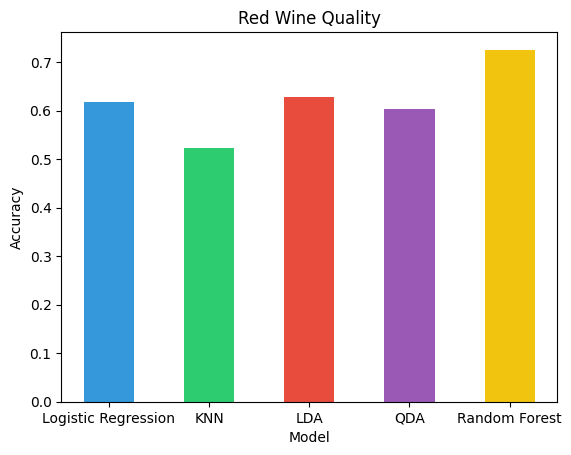

In [16]:
# Set x-axis labels
labels = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Random Forest']

# Set y-axis values
values = [logreg_scores.mean(), knn_scores.mean(), lda_scores.mean(), qda_scores.mean(), rf_scores.mean()]

# Set bar colors and width
colors = ['#3498DB', '#2ECC71', '#E74C3C', '#9B59B6', '#F1C40F']
width = 0.5

# Plot bar chart
plt.bar(labels, values, width=width, color=colors)

# Set chart title and axis labels
plt.title('Red Wine Quality')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the chart
plt.show()

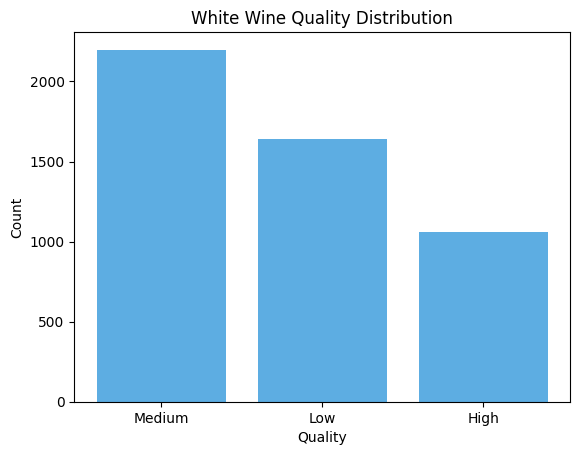

In [17]:
# Load the white winequality dataset
url = "https://raw.githubusercontent.com/bradykuo/WineQuality-Dataset-Analysis/main/winequality-white.csv"
df = pd.read_csv(url)

# Split the data into features (X) and target variable (y)
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
quality_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "Medium",7: "High",8 : "High",9 : "High"}
y =  df['quality'].map(quality_mapping)

# Define the counts for each quality level
quality_counts = y.value_counts()

# Create a bar plot
plt.bar(quality_counts.index, quality_counts.values, color='#5DADE2')

# Set the title and axis labels
plt.title('White Wine Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')

# Display the plot
plt.show()

In [18]:
# Define the logistic regression model
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
logreg_scores = cross_val_score(logreg, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", logreg_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLogistic Regression Mean accuracy score:", logreg_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Accuracy scores for each fold:
 [0.54285714 0.57653061 0.55714286 0.59244127 0.57303371]

Logistic Regression Mean accuracy score: 0.5684011173417273


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [19]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
knn_scores = cross_val_score(knn, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", knn_scores)

# Calculate and print the mean accuracy score across all folds
print("\nKNN Mean accuracy score:", knn_scores.mean())

Accuracy scores for each fold:
 [0.52244898 0.5255102  0.49897959 0.50970378 0.49744637]

KNN Mean accuracy score: 0.5108177857455545


In [20]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
lda_scores = cross_val_score(lda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", lda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nLDA Mean accuracy score:", lda_scores.mean())

Accuracy scores for each fold:
 [0.56428571 0.57142857 0.56020408 0.60163432 0.57814096]

LDA Mean accuracy score: 0.575138729649163


In [21]:
# Define the QDA model
qda = QuadraticDiscriminantAnalysis()

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
qda_scores = cross_val_score(qda, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", qda_scores)

# Calculate and print the mean accuracy score across all folds
print("\nQDA Mean accuracy score:", qda_scores.mean())

Accuracy scores for each fold:
 [0.53061224 0.50918367 0.53367347 0.5485189  0.52400409]

QDA Mean accuracy score: 0.5291984740780888


In [22]:
# Define the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv_method = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Use cross-validation to evaluate the model
rf_scores = cross_val_score(rf, X, y, cv=cv_method)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:\n", rf_scores)

# Calculate and print the mean accuracy score across all folds
print("\nRandom Forest Mean accuracy score:", rf_scores.mean())

Accuracy scores for each fold:
 [0.73571429 0.7255102  0.72346939 0.74463739 0.70480082]

Random Forest Mean accuracy score: 0.7268264159596424


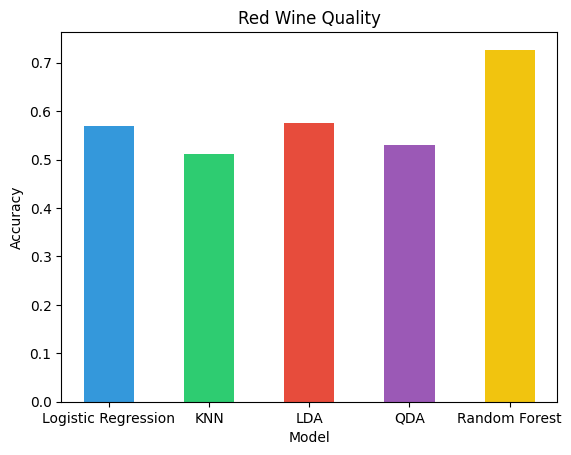

In [23]:
# Set x-axis labels
labels = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Random Forest']

# Set y-axis values
values = [logreg_scores.mean(), knn_scores.mean(), lda_scores.mean(), qda_scores.mean(), rf_scores.mean()]

# Set bar colors and width
colors = ['#3498DB', '#2ECC71', '#E74C3C', '#9B59B6', '#F1C40F']
width = 0.5

# Plot bar chart
plt.bar(labels, values, width=width, color=colors)

# Set chart title and axis labels
plt.title('Red Wine Quality')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the chart
plt.show()